In [3]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

In [4]:
url="http://covidtracking.com/api/states/daily.csv"
s=requests.get(url).content

In [5]:
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [6]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')

In [7]:
df.drop(['dateChecked'],axis=1,inplace=True)

In [8]:
df['state']=df['state'].apply(str)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17746 entries, 0 to 17745
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         17746 non-null  datetime64[ns]
 1   state                        17746 non-null  object        
 2   positive                     17561 non-null  float64       
 3   probableCases                7539 non-null   float64       
 4   negative                     17409 non-null  float64       
 5   pending                      1869 non-null   float64       
 6   totalTestResultsSource       17746 non-null  object        
 7   totalTestResults             17645 non-null  float64       
 8   hospitalizedCurrently        14477 non-null  float64       
 9   hospitalizedCumulative       10840 non-null  float64       
 10  inIcuCurrently               9267 non-null   float64       
 11  inIcuCumulative              3144 non-nul

### Peeking into the data

In [10]:
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-01-12,AK,48797.0,NaN,1308911.0,NaN,totalTestsViral,1357708.0,79.0,1104.0,...,1357708,0,0,1de50bd029c3c58bca4c4fdf884f584c7f61e35d,0,0,0,0,0,NaN
1,2021-01-12,AL,407848.0,82772.0,1655943.0,NaN,totalTestsPeopleViral,1981019.0,3076.0,37587.0,...,2063791,226,0,3aec350f19695232b23ca49b90b9626f7a21b195,0,0,0,0,0,NaN
2,2021-01-12,AR,259553.0,48680.0,1997863.0,NaN,totalTestsViral,2208736.0,1354.0,12313.0,...,2257416,40,198,c5fce88acccf48aa5ac2fe7e7c2af099689e865e,0,0,0,0,0,NaN
3,2021-01-12,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,5a84f726daeb1c0980055525eef3411b10c2e8aa,0,0,0,0,0,NaN
4,2021-01-12,AZ,636100.0,34250.0,2513894.0,NaN,totalTestsViral,5742443.0,5082.0,44389.0,...,3149994,335,753,37f10df3a627fd96a9f8531b63ebd2551595d35a,0,0,0,0,0,NaN


In [11]:
df.fillna(value=-1, inplace=True)

In [12]:
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-01-12,AK,48797.0,-1.0,1308911.0,-1.0,totalTestsViral,1357708.0,79.0,1104.0,...,1357708,0,0,1de50bd029c3c58bca4c4fdf884f584c7f61e35d,0,0,0,0,0,-1.0
1,2021-01-12,AL,407848.0,82772.0,1655943.0,-1.0,totalTestsPeopleViral,1981019.0,3076.0,37587.0,...,2063791,226,0,3aec350f19695232b23ca49b90b9626f7a21b195,0,0,0,0,0,-1.0
2,2021-01-12,AR,259553.0,48680.0,1997863.0,-1.0,totalTestsViral,2208736.0,1354.0,12313.0,...,2257416,40,198,c5fce88acccf48aa5ac2fe7e7c2af099689e865e,0,0,0,0,0,-1.0
3,2021-01-12,AS,0.0,-1.0,2140.0,-1.0,totalTestsViral,2140.0,-1.0,-1.0,...,2140,0,0,5a84f726daeb1c0980055525eef3411b10c2e8aa,0,0,0,0,0,-1.0
4,2021-01-12,AZ,636100.0,34250.0,2513894.0,-1.0,totalTestsViral,5742443.0,5082.0,44389.0,...,3149994,335,753,37f10df3a627fd96a9f8531b63ebd2551595d35a,0,0,0,0,0,-1.0


In [14]:
def plot_var(var='positiveIncrease',
             state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

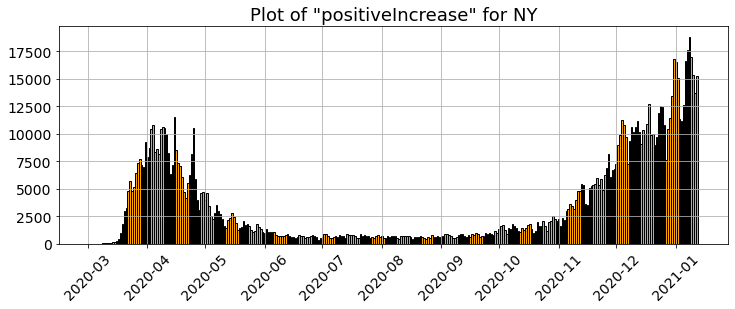

In [15]:
plot_var()

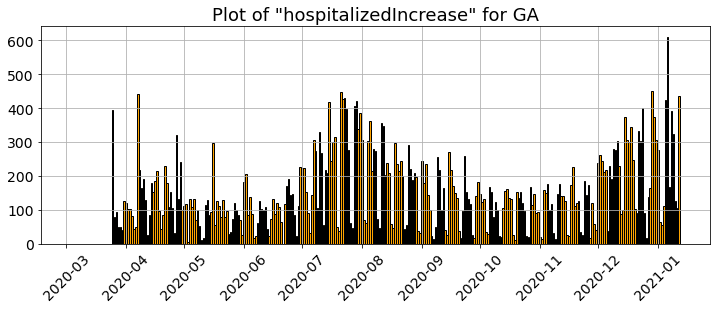

In [16]:
plot_var('hospitalizedIncrease','GA')

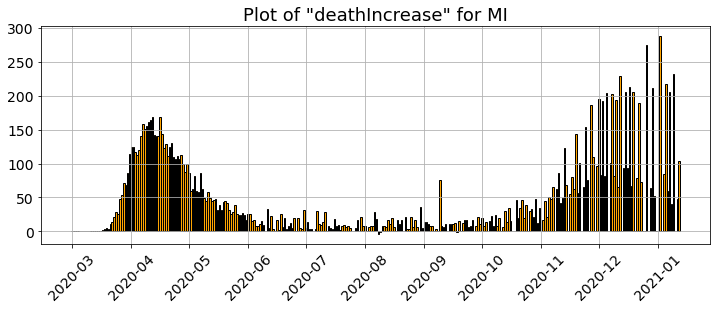

In [17]:
plot_var('deathIncrease','MI')

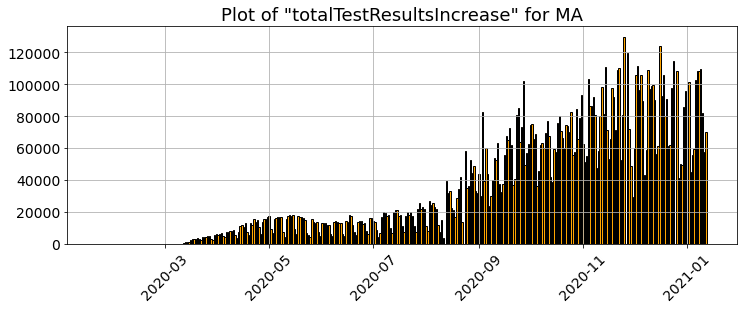

In [18]:
plot_var('totalTestResultsIncrease','MA')

In [19]:
def plot_xy(varx='totalTestResultsIncrease',
            vary='positiveIncrease',
            state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = df[df['state']==state][vary]
    x = df[df['state']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

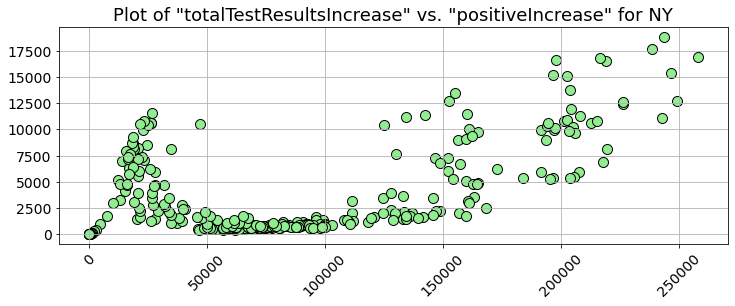

In [20]:
plot_xy(state='NY')

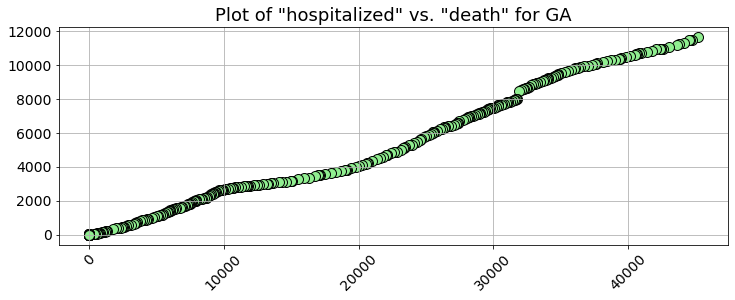

In [21]:
plot_xy('hospitalized','death','GA')

In [22]:
plot_xy('hospitalized','death','CA')

Some of the data unavailable for a scatter plot. Sorry!


In [23]:
def fatality_ratio(state='CA'):
    """
    Computes the fatality ratio for the given state
    Fatality ratio is the ratio of total dead to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        d = float(df[(df['state']==state) & (df['date']==date)]['death'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

In [24]:
def hospitalization_ratio(state='NY'):
    """
    Computes the hospitalization ratio for the given state
    Hospitalization ratio is the ratio of total hospitalized to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        h = float(df[(df['state']==state) & (df['date']==date)]['hospitalized'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (h!=-1.0) and (p!=-1.0) and (p!=0):
        return round(h/p,3)
    else:
        return -1

In [25]:
def positiveTest_ratio(state='NY'):
    """
    Computes the test-positive ratio for the given state
    Test-positive ratio is the ratio of total positive cases to total number of tests
    """
    
    date = df.iloc[0]['date']
    try:
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
        t = float(df[(df['state']==state) & (df['date']==date)]['totalTestResults'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (p!=-1.0) and (t!=-1.0) and (t!=0):
        return round(p/t,3)
    else:
        return -1

In [26]:
def recovery_ratio(state='NY'):
    """
    Computes the recovery ratio for the given state
    Recovery ratio is the ratio of total recovered cases to total positive cases
    """
    
    date = df.iloc[0]['date']
    try:
        r = float(df[(df['state']==state) & (df['date']==date)]['recovered'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (r!=-1.0) and (p!=-1.0) and (p!=0):
        return round(r/p,3)
    else:
        return -1

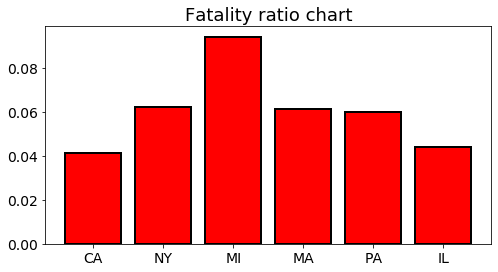

In [26]:
states = ['CA','NY','MI','MA','PA','IL']
fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='red',
        edgecolor='k',linewidth=2)
plt.show()

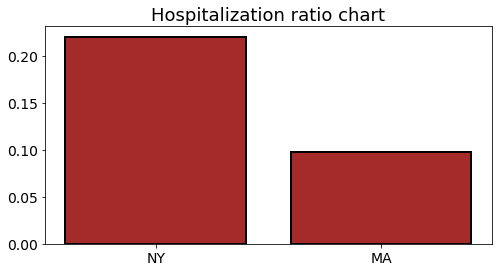

In [27]:
states = ['CA','NY','MI','MA','PA','IL']
hos,x = [],[]
for s in states:
    data = hospitalization_ratio(s)
    if data!=-1:
        hos.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Hospitalization ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=hos,color='brown',
        edgecolor='k',linewidth=2)
plt.show()